In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import tensorflow

from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.keras.datasets import mnist
(features_train, targets_train), (features_test, targets_test) = mnist.load_data()

# Convert to float32.
features_train = np.array(features_train, np.float32)
features_test = np.array(features_test, np.float32)

# Flatten images to 1-D vector of 784 features (28*28).
features_train  = features_train.reshape([-1, 784]) 
features_test = features_test.reshape([-1, 784])

# Normalize images value from [0, 255] to [0, 1]
features_train = features_train / 255.
features_test =  features_test / 255.
print(features_train)
print(targets_train)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 ... 5 6 8]


In [4]:
#  create feature and targets tensor for train set
torch_x_train = torch.from_numpy(features_train)
torch_y_train = torch.from_numpy(targets_train)

# create feature and targets tensor for test set.
torch_x_test = torch.from_numpy(features_test)
torch_y_test = torch.from_numpy(targets_test)
type(torch_x_test)

torch.Tensor

In [5]:
# batch_size, epoch and iteration
from  torch.utils.data import TensorDataset
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets - Tensordataset
train_data=TensorDataset(torch_x_train,torch_y_train)
test_data=TensorDataset(torch_x_test,torch_y_test)

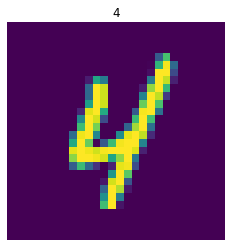

In [8]:
# data loader
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size,shuffle=False)

#  visualize one of the images in data set
plt.imshow(features_train[166].reshape(28,28))
plt.axis('off')
plt.title(str(targets_train[166]))
plt.savefig('graph.png')
plt.show()

In [10]:
# Create ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
    def forward(self, x):
        # HL1 with relu activation
        out = self.relu(self.layer1(x))
        
        # HL2 with relu activation
        out = self.relu(self.layer2(out))
        
        # Output layer with LogSoftmax activation
        out = self.layer3(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 166 
output_dim = 10
# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)
print(model)

# Cross Entropy Loss
loss = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


ANNModel(
  (layer1): Linear(in_features=784, out_features=166, bias=True)
  (layer2): Linear(in_features=166, out_features=166, bias=True)
  (layer3): Linear(in_features=166, out_features=10, bias=True)
  (relu): ReLU()
)
CrossEntropyLoss()


In [11]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        output=model(train)
        
        # Calculate softmax and cross entropy loss
        error = loss(output, labels)
        
        # Calculating gradients
        error.backward()
        
        # Update parameters
        optimizer.step()
        count += 1
        if count % 50 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            predicted=[]
            # Predict test dataset
            
            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                output=model(test)
                total=len(labels)
                
                # Total correct predictions
                prediction= torch.max(output.data, 1)[1]
                correct=(prediction==labels).sum()
            accuracy = 100 * correct / float(total)
            # store loss and iteration
            loss_list.append(error.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            print('Iteration: {} Loss: {} Accuracy: {} %'.format(count, error.data, accuracy))


Iteration: 500 Loss: 0.7699797749519348 Accuracy: 80.0 %
Iteration: 1000 Loss: 0.49407246708869934 Accuracy: 87.0 %
Iteration: 1500 Loss: 0.5668748021125793 Accuracy: 90.0 %
Iteration: 2000 Loss: 0.3104695975780487 Accuracy: 88.0 %
Iteration: 2500 Loss: 0.20094123482704163 Accuracy: 90.0 %
Iteration: 3000 Loss: 0.32210731506347656 Accuracy: 92.0 %
Iteration: 3500 Loss: 0.2554474174976349 Accuracy: 92.0 %
Iteration: 4000 Loss: 0.2910732328891754 Accuracy: 91.0 %
Iteration: 4500 Loss: 0.4211401045322418 Accuracy: 90.0 %


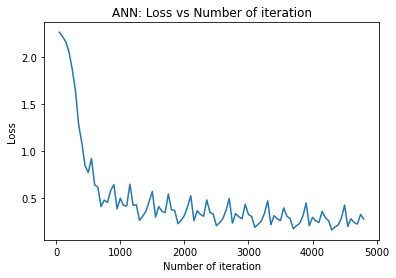

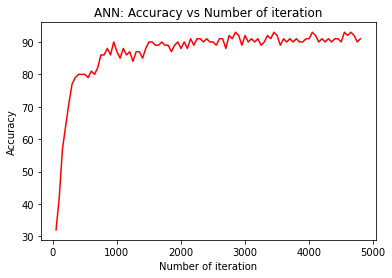

In [12]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()
